###**Mounting the Google drive to load our dataset file 🠗**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


###**Importing necessary librabries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib  inline

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

##**Reading the CSV file**

In [ ]:
path = "/content/drive/MyDrive/Project/quikr_car.csv"
car = pd.read_csv(path)
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
car.shape

(892, 6)

We have 892 rows and 6 columns

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


All the columns are of object data type.

###**Quality of data ->**
*   names are pretty inconsistent
*   names have company names attached to it
*   some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
*   company: many of the names are not of any company like 'Used', 'URJENT', and so on.
*   year has many non-year values
*   year is in object. Change to integer
*   Price has Ask for Price
*   Price has commas in its prices and is in object
*   kms_driven has object values with kms at last.
*   It has nan values and two rows have 'Petrol' in them
*   fuel_type has nan values




##**Data_preprocessing/cleaning**

In [ ]:
 car['year'].str.isnumeric().sum()

842

Out of 892 rows 842 rows has numeric values present in year's columns, so we will filter out rows with numeric columns.

In [ ]:
car = car[car['year'].str.isnumeric()]

In [ ]:
car['year'] = car['year'].astype(int)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


In [ ]:
car = car[car['Price']!='Ask For Price']

Filtered out rows with price set as = Ask For Price

In [ ]:
car['Price' ]= car['Price'].str.replace(',','').astype(int)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int64 
 3   Price       819 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.8+ KB


In [ ]:
car['kms_driven'].str.split(' ')

0        [45,000, kms]
1            [40, kms]
3        [28,000, kms]
4        [36,000, kms]
6        [41,000, kms]
            ...       
886    [1,32,000, kms]
888      [27,000, kms]
889      [40,000, kms]
890           [Petrol]
891           [Petrol]
Name: kms_driven, Length: 819, dtype: object

Here we have split the numeric and kms , now we will extract numeric value from it


In [ ]:
car['kms_driven'] = car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [ ]:
car['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

Here we can see we have values = Petrol assigned to some rows so we will now filter out rows with only numeric values

In [ ]:
car = car[car['kms_driven'].str.isnumeric()]

In [ ]:
car['kms_driven'] = car['kms_driven'].astype(int)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [ ]:
car = car[~car['fuel_type'].isna()]

~ = this symbol means excluding rows with nan values it get all other rows

basically we are dropping the rows with nan values

In [ ]:
car['name'].str.split(' ')

0        [Hyundai, Santro, Xing, XO, eRLX, Euro, III]
1                        [Mahindra, Jeep, CL550, MDI]
3      [Hyundai, Grand, i10, Magna, 1.2, Kappa, VTVT]
4              [Ford, EcoSport, Titanium, 1.5L, TDCi]
6                                        [Ford, Figo]
                            ...                      
883                  [Maruti, Suzuki, Ritz, VXI, ABS]
885                  [Tata, Indica, V2, DLE, BS, III]
886                          [Toyota, Corolla, Altis]
888                          [Tata, Zest, XM, Diesel]
889                            [Mahindra, Quanto, C8]
Name: name, Length: 816, dtype: object

In [ ]:
car['name'].str.split(' ').str.slice(0,3)

0         [Hyundai, Santro, Xing]
1         [Mahindra, Jeep, CL550]
3           [Hyundai, Grand, i10]
4      [Ford, EcoSport, Titanium]
6                    [Ford, Figo]
                  ...            
883        [Maruti, Suzuki, Ritz]
885            [Tata, Indica, V2]
886      [Toyota, Corolla, Altis]
888              [Tata, Zest, XM]
889        [Mahindra, Quanto, C8]
Name: name, Length: 816, dtype: object

In [ ]:
car['name'] = car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [ ]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


Above we can see our indexes are mismatched or not in a right order so we will just reset the indexes.

In [ ]:
car = car.reset_index(drop=True)

In [ ]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


###**Outliers**

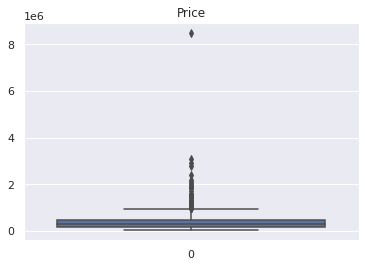

In [ ]:
sns.boxplot(data = car['Price'])
plt.title('Price')
plt.show()

In [ ]:
car = car[car['Price']<6e6].reset_index(drop=True)

Here we have removed rows having price above 60 lakhs

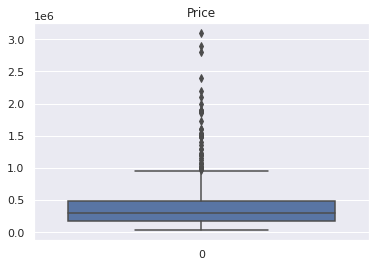

In [ ]:
sns.boxplot(data = car['Price'])
plt.title('Price')
plt.show()

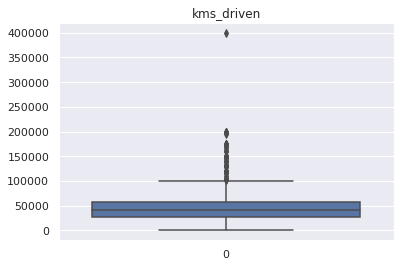

In [ ]:
sns.boxplot(data = car['kms_driven'])
plt.title('kms_driven')
plt.show()

In [ ]:
car = car[car['kms_driven']<3e5]

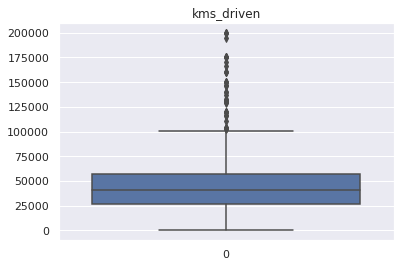

In [ ]:
sns.boxplot(data = car['kms_driven'])
plt.title('kms_driven')
plt.show()

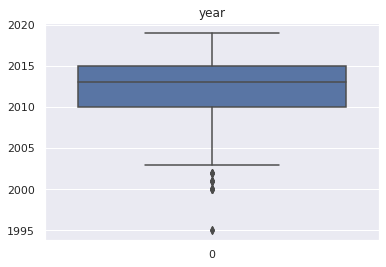

In [ ]:
sns.boxplot(data = car['year'])
plt.title('year')
plt.show()

We will not be handling outliers beacause we want actual data for our model , handling it will effect our model prediction.

In [ ]:
car = car.reset_index(drop=True)

###**Visualization**

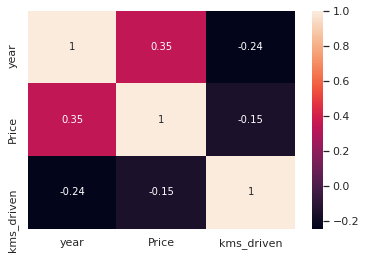

In [ ]:
x = car.corr()
plt.figure(figsize=(6,4))
sns.heatmap(x ,  annot = True)
plt.yticks(rotation = 90)
plt.show()

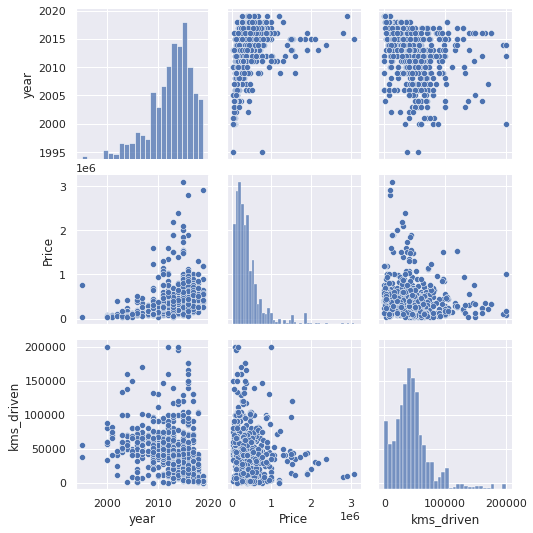

In [ ]:
sns.pairplot(data = car)
plt.show()

###Checking relationship of Company with Price

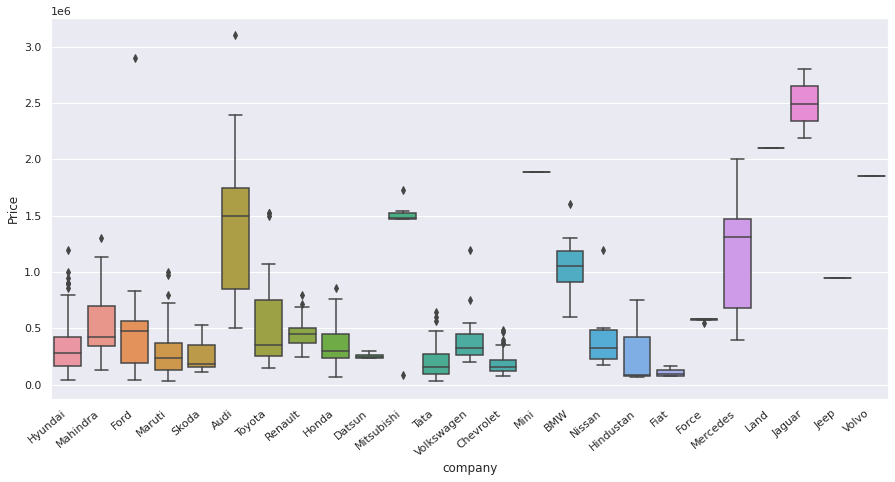

In [ ]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

Here we understand that the re-sell prices of Audi, Mitsubishi, Mini, BMW, Mercedes, Land Rover, Jaguar, Volvo are much higher than other cars.

###Checking relationship of Year with Price

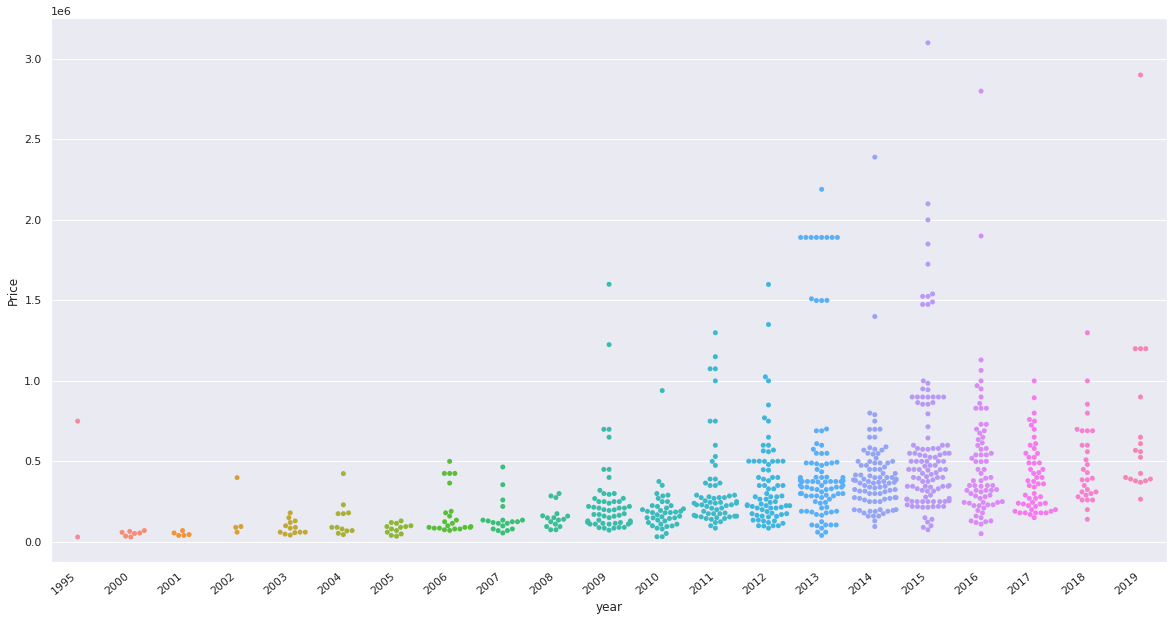

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

Looking at above graph we can analyse that the older the car is less is its re-selling price and the newer the car is more is its re-selling price

###Checking relationship of kms_driven with Price

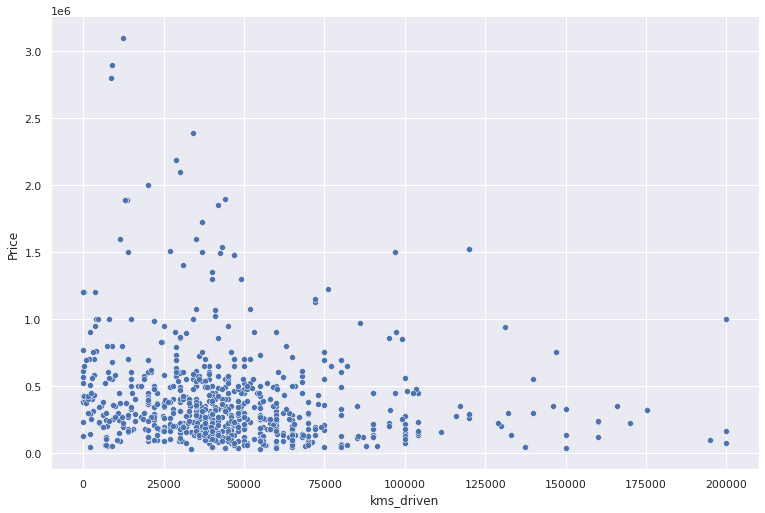

In [ ]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)
plt.show()

From the above graph we understand that the price of the car decreases with increase in kms driven.

###Checking relationship of Fuel Type with Price

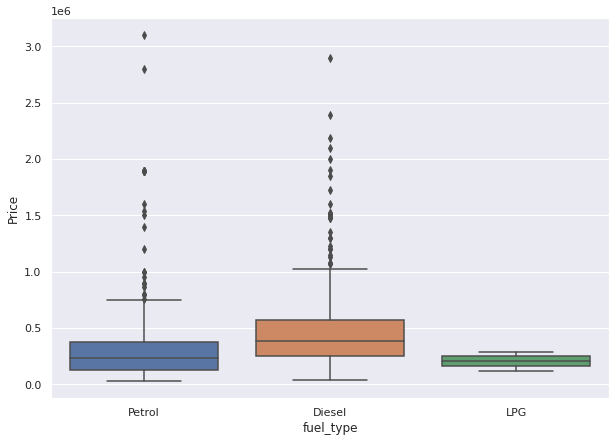

In [ ]:
plt.subplots(figsize=(10,7))
sns.boxplot(x='fuel_type',y='Price',data=car)
plt.show()

Here we understand that the re-sell price of LPG is much less than Petrol and Diesel.

In [ ]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [ ]:
car = car.reset_index(drop=True)

###This is our final dataset ->

In [ ]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [ ]:
car.to_csv('Cleaned_Car_data.csv')

##**Modeling ->**

In [ ]:
x = car[['name','company','year','kms_driven','fuel_type']]
y = car['Price']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
ohe = OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']), remainder='passthrough')

In [ ]:
lr = LinearRegression()

In [ ]:
pipe = make_pipeline(column_trans,lr)

In [ ]:
pipe.fit(xtrain, ytrain)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'B...
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)],
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                          

In [ ]:
ypred = pipe.predict(xtest)

In [ ]:
r2_score(ytest,ypred)

0.7538016960110147

Now this accuracy is very less , so we will pass 1000 random_state to our train_test_split to get best accuracy.

In [ ]:
scores=[]
for i in range(1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(xtrain,ytrain)
    ypred=pipe.predict(xtest)
    scores.append(r2_score(ytest,ypred))

In [ ]:
np.argmax(scores)

433

In [ ]:
scores[np.argmax(scores)]

0.850866899225511

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
r2_score(ytest,ypred)

0.850866899225511

Now , we are getting **85%** accuracy

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe, open('LinearReg.pkl','wb'))

In [ ]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([436471.75935922])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
pipe = make_pipeline(column_trans,rf)
pipe.fit(xtrain, ytrain)
ypred_rf = pipe.predict(xtest)
r2_score(ytest,ypred_rf)

0.7029833350102254

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cat = CatBoostRegressor(eval_metric ="AUC")
pipe = make_pipeline(column_trans,cat)
pipe.fit(xtrain, ytrain)
ypred_cat = pipe.predict(xtest)

In [ ]:
r2_score(ytest,ypred_cat)

0.7127945981247712